In [378]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')


In [379]:
df_factory = pd.read_csv('data/clean_pcfactory.csv')
df_falabella = pd.read_csv('data/clean_falabella.csv')

In [380]:
#Comparar marcas en venta por de pc factory y falabella
print(df_factory.marca.sort_values().unique().tolist())
print(df_falabella.marca.sort_values().unique().tolist())

['Acer', 'Apple', 'Asus', 'Dell', 'Gear', 'HP', 'Huawei', 'Lenovo', 'MSI']
['Acer', 'Apple', 'Asus', 'Dell', 'GAMEPRO', 'Hp', 'Huawei', 'Hyundai', 'INTEL', 'Lenovo', 'MLAB', 'Msi', 'Razer', 'TECNOCAM', 'Texas', 'Toshiba', 'amd']


In [381]:
#Eliminar marcas que no se utilizarán para el analisis
drop_labels = df_falabella[df_falabella.marca.isin(['Texas','MLAB','INTEL','GAMEPRO','TECNOCAM'])].index.tolist()
df_falabella.drop(drop_labels,inplace=True)
df_falabella.reset_index(drop=True,inplace=True)

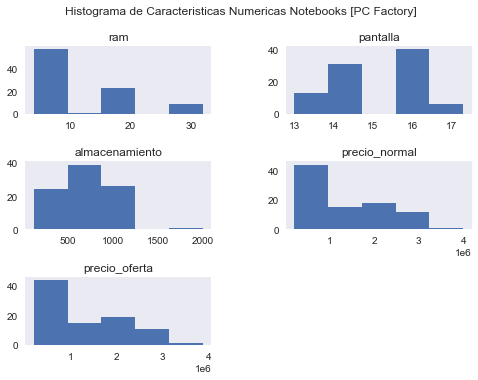

In [382]:
df_factory.hist(bins=5,grid=False)
plt.suptitle("Histograma de Caracteristicas Numericas Notebooks [PC Factory]")
plt.subplots_adjust(wspace=0.4,hspace=0.7)
plt.show()

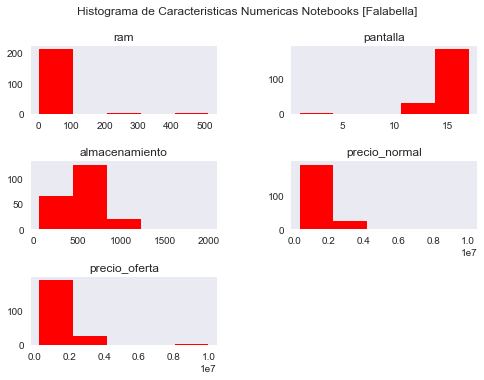

In [383]:
df_falabella.hist(bins=5,grid=False,color='r')
plt.suptitle("Histograma de Caracteristicas Numericas Notebooks [Falabella]")
plt.subplots_adjust(wspace=0.4,hspace=0.7)
plt.show()

In [384]:
def calculate_variation_sale_price(df):
    mean_var_price = round((df.precio_normal - df.precio_oferta).mean())
    max_var_price = round((df.precio_normal - df.precio_oferta).max())
    min_var_price = round((df.precio_normal - df.precio_oferta).min())

    print("Rebaja en Precios de Oferta de Notebooks y Computadores en ",df.compania.unique())

    print("\nRebaja Promedio: $",int(mean_var_price))
    print("Rebaja Minima: $",int(min_var_price))
    print("Rebaja Maxima: $",int(max_var_price))

    return 

In [385]:
calculate_variation_sale_price(df_factory)

Rebaja en Precios de Oferta de Notebooks y Computadores en  ['Pc Factory']

Rebaja Promedio: $ 45083
Rebaja Minima: $ 9900
Rebaja Maxima: $ 145000


In [386]:
calculate_variation_sale_price(df_falabella)

Rebaja en Precios de Oferta de Notebooks y Computadores en  ['Falabella']

Rebaja Promedio: $ 82155
Rebaja Minima: $ 20000
Rebaja Maxima: $ 600000


In [387]:
#Concatenar Data de Pc Fctory y Falabella en nuevo Dataframe
df = pd.concat([df_factory,df_falabella],axis=0)
#estandarizar nombres de marcas
df.marca = df.marca.str.lower()
#Agregar columna con la diferencia entre precio normal y precio de oferta (rebaja de precio)
df['rebaja_de_precio'] = df['precio_normal'] - df['precio_oferta']

In [388]:
#Limpiar y estandarizar datos sobre procesadores y Tarjeta Grafica
df.procesador = df.procesador.str.replace(r"™|®","").str.replace(r"\xa0"," ").str.lower().str.extract(r"(^\w+\s*\w+\s\w*)")
df.procesador = df.procesador.str.replace(r"\s5$"," r5").str.replace(r"n\d+$|e$","").str.strip()
df.procesador = df.procesador.str.replace("ryzen 5 4500u","amd ryzen r5")

df.tarjeta_grafica = df.tarjeta_grafica.str.replace(r"™|®","").str.replace(r"^\w*\s*\w*:","").str.extract(r"(^\w+\s\w+)")

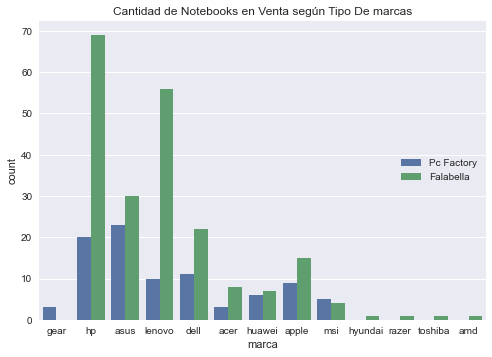

In [389]:
sns.countplot(x='marca',hue='compania',data=df)
plt.legend(loc='right')
plt.title("Cantidad de Notebooks en Venta según Tipo De marcas")
plt.show()

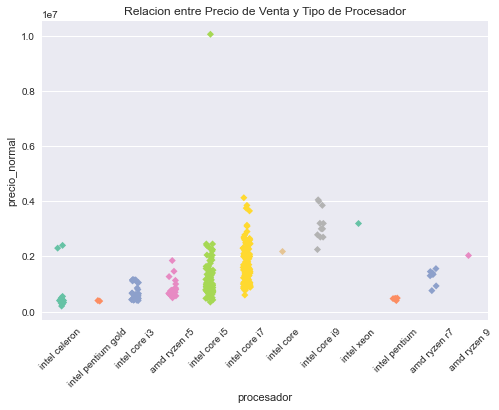

In [390]:
ax = sns.stripplot(x='procesador',y='precio_normal',data =df,palette='Set2',marker='D')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Relacion entre Precio de Venta y Tipo de Procesador')
plt.show()

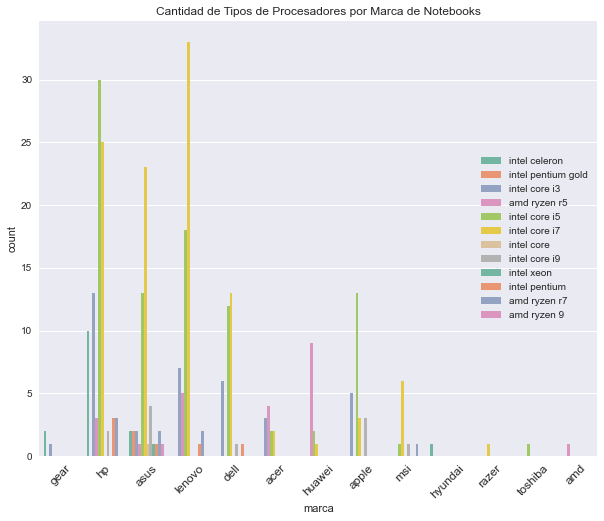

In [391]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x='marca',hue='procesador',data=df,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=12)
ax.set_title("Cantidad de Tipos de Procesadores por Marca de Notebooks")
ax.legend(loc='right')
plt.show()

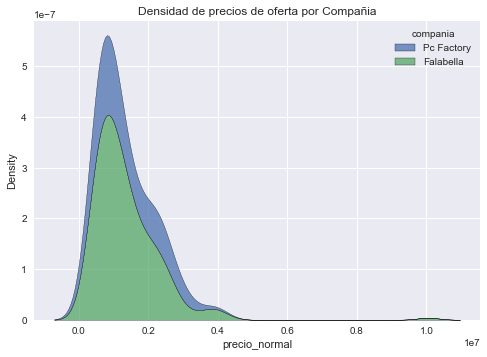

In [392]:
sns.kdeplot(data=df,x='precio_normal',hue='compania',multiple='stack')
plt.title("Densidad de precios de oferta por Compañia")
plt.show()

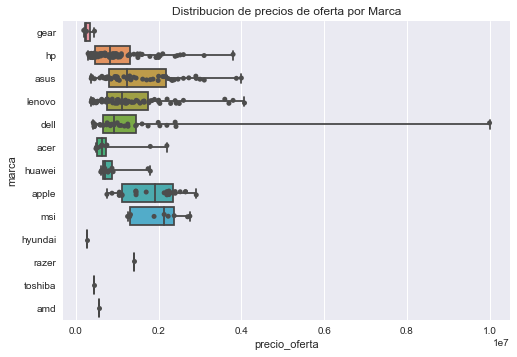

In [393]:
ax = sns.boxplot(x='precio_oferta',y='marca',data=df,whis=np.inf)
ax = sns.stripplot(x='precio_oferta',y='marca',data=df,color=".3")
ax.set_title("Distribucion de precios de oferta por Marca")
plt.show()

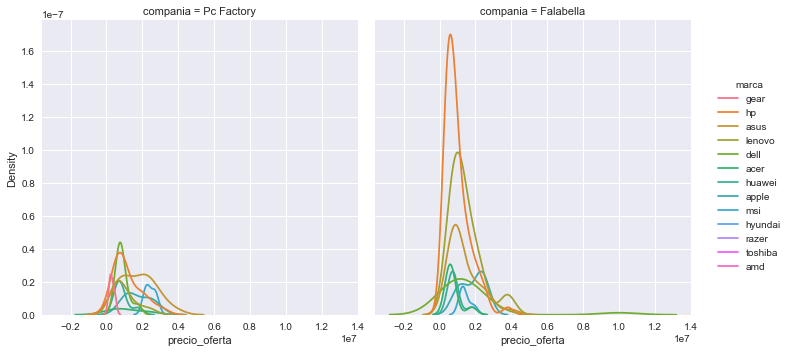

In [394]:
sns.displot(data=df,x='precio_oferta',hue='marca',col='compania',kind='kde')
plt.show()

In [395]:
#Agrupar Dataset por marca y compañoa
group_df = df.groupby(['marca','compania']).mean()
group_df = group_df.reset_index()

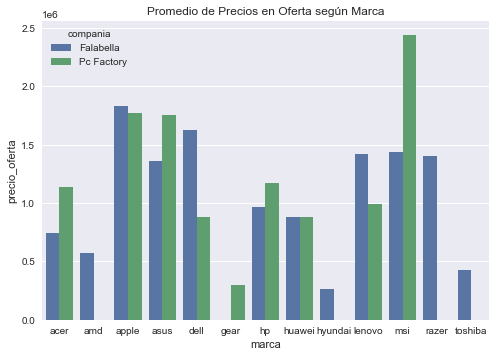

In [396]:
sns.barplot(x='marca',y='precio_oferta',hue='compania',data=group_df)
plt.title('Promedio de Precios en Oferta según Marca')
plt.show()

In [397]:
#Agregar precio de oferta maximo y minimo por marca y compañia

group_df['precio_oferta_max'] = df.groupby(['marca','compania'])['precio_oferta'].max().reset_index()['precio_oferta']
group_df['precio_oferta_min'] = df.groupby(['marca','compania'])['precio_oferta'].min().reset_index()['precio_oferta']
group_df.rename(columns={'precio_oferta':'precio_oferta_prom'},inplace=True)

In [398]:
#Pivotear dataframe para visualizar en grafico
group_melt = group_df[['marca','compania','precio_oferta_max','precio_oferta_prom','precio_oferta_min']].melt(id_vars=['marca','compania'])

<Figure size 1800x1800 with 0 Axes>

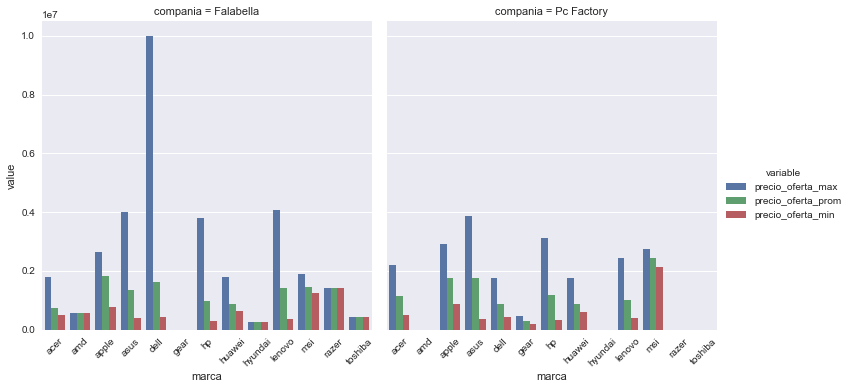

In [399]:
#Grafico de barras con precios de oferta minimo, promedio y maximo por marca y compañia
fig = plt.figure(figsize=(25,25))
g = sns.catplot(x='marca',y='value',hue='variable',col='compania',data=group_melt,kind='bar')
g.set_xticklabels(rotation=45)
plt.show()

<Figure size 1440x1440 with 0 Axes>

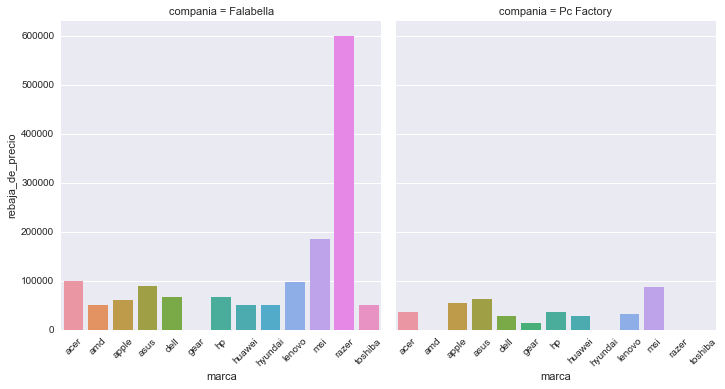

In [408]:
#Grafico de Barra de rebaja de precio promedio segun marca y compañia
fig = plt.figure(figsize=(20,20))
g = sns.catplot(x='marca',y='rebaja_de_precio',col='compania',data=group_df,kind='bar')
g.set_xticklabels(rotation=45)
plt.show()

In [413]:
# acceder a url de la oferta con valor más alto de rebaja de precio ($600.000)
df[df.marca.isin(['razer'])]['urls'].values

array(['https://www.falabella.com/falabella-cl/product/12720346/Notebook-Gamer-RAZER-RZ09-03009-Intel-Core-i7-9750H-16GB-RAM-256GB-SSD-NVIDIA-GeForce-GTX-1660-Ti-15.6-/12720346'],
      dtype=object)